# Convolutional Neural Network with TensorFlow

This is notebook of hands-on CNN Tutorial with TensorFlow in Datacamp [here](https://www.datacamp.com/community/tutorials/cnn-tensorflow-python).

## Import libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from tensorflow.examples.tutorials.mnist import input_data # depecrated on r1.10
from tensorflow.keras.datasets.fashion_mnist import load_data
# for training on GPU
# import os
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

## Load the data

In [2]:
# data = input_data.read_data_sets('data/fashion', one_hot=True, source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')
data_train, data_test = load_data()

## Explore the data

In [3]:
# shapes of training and test data
print('[INFO] training set (image) shape: ', data_train[0].shape)
print('[INFO] training set (label) shape: ', data_train[1].shape)

print('[INFO] test set (image) shape: ', data_test[0].shape)
print('[INFO] test set (label) shape: ', data_test[1].shape)

[INFO] training set (image) shape:  (60000, 28, 28)
[INFO] training set (label) shape:  (60000,)
[INFO] test set (image) shape:  (10000, 28, 28)
[INFO] test set (label) shape:  (10000,)


In [4]:
data_train

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

For simplicity, a dictionary will be created with corresponding labels class

In [5]:
# create library correspond to label class
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dresser',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}
label_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dresser',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

### Show the images

Text(0.5,1,'(Label: Ankle Boot)')

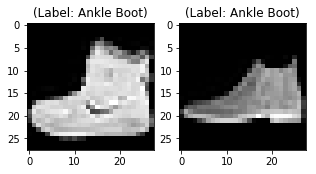

In [6]:
plt.figure(figsize=(5,5))

# first image in training set
plt.subplot(121)
curr_img = np.reshape(data_train[0][0], newshape=(28,28))
curr_lbl = data_train[1][0]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# first image in testing set
plt.subplot(122)
curr_img = np.reshape(data_test[0][0], newshape=(28,28))
curr_lbl = data_test[1][0]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

## Splitting the data into feature and target

Here we will split the `data_train` and `data_test` into `X_train`, `X_label` and `y_train`, `y_label`. Because the result of `load_data` actually comprises 2 tuple of 2 tuples, hence we just need to define it like breaking down a common tuple.

In [30]:
X_train, X_label = data_train
y_train, y_label = data_test
print('[INFO] shape of X_train and X_label:\n{},{}'.format(X_train.shape, X_label.shape))
print('[INFO] shape of y_train and y_label:\n{},{}'.format(y_train.shape, y_label.shape))

[INFO] shape of X_train and X_label:
(60000, 28, 28),(60000,)
[INFO] shape of y_train and y_label:
(10000, 28, 28),(10000,)


## Data Preprocessing

In [31]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Notice that the values is still in range between 0-255. Hence, we need to scale it down into 0-1.

In [32]:
print('[INFO] min value: ', np.min(X_train[0]))
print('[INFO] max value: ', np.max(X_train[0]))

[INFO] min value:  0
[INFO] max value:  255


In [33]:
# scale into 0-1 by dividing it by 255
X_train, y_train = X_train/255.0, y_train/255.0

print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

Text(0.5,1,'(Label: Ankle Boot)')

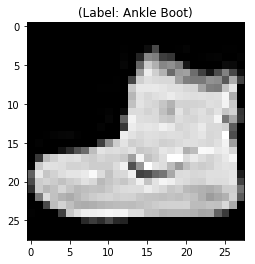

In [34]:
# plot the rescaled image
curr_img = np.reshape(X_train[0], newshape=(28,28))
curr_lbl = X_label[0]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

We also need to one-hot encode the X_label and y_train.

In [37]:
encoder = OneHotEncoder()
encoder.fit(X_label.reshape((-1,1)))
X_label = encoder.transform(X_label.reshape((-1,1)))
y_label = encoder.transform(y_label.reshape((-1,1)))

print('[DEBUG] X_label newshape: ', X_label.shape)
print('[DEBUG] y_label newshape: ', y_label.shape)
print('X_label[0]: ', X_label[0])
print('y_label[0]: ', y_label[0])

[DEBUG] X_label newshape:  (60000, 10)
[DEBUG] y_label newshape:  (10000, 10)
X_label[0]:    (0, 9)	1.0
y_label[0]:    (0, 9)	1.0


### Reshape the data input

It's important to reshape into size of $28x28$ so that it can be fed into neural networks

In [43]:
# reshape the train and test image
X_train = X_train.reshape(-1,28,28,1)
y_train = y_train.reshape(-1, 28, 28, 1)

print(X_train.shape, y_train.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


## Deep Neural Network Architecture

we will build using __three convolutional layers__:
* the first layer will have $32-3x3$  filters,
* the second layer will have $64-3x3$ filters,
* the third layer will have $128-3x3$ filters.

In addition, there are also __three max-pooling layers__ each of size $2x2$ after every convolutional layers.

First, before building the architecture, we need to define `TRAINING_ITERS`, `BATCH_SIZE`, and `LEARNING_RATE`.

In [44]:
TRAINING_ITERS = 200
LEARNING_RATE = 0.001
BATCH_SIZE = 128

we also need to define networ parameters

In [45]:
# the dimension of image is (28x28)
n_input = 28

# the class target is 0-9
n_classes = 10

create a placeholder for input X and output y

In [46]:
x = tf.placeholder(dtype='float', shape=(None, 28, 28, 1))
y = tf.placeholder(dtype='float', shape=(None, n_classes))

## Wrappers

In the architectural model, we will have multiple convolution layers and max-pooling layers. Hence, it's better to define a convolution and max-pooling function so that we can easily use them many times

In [47]:
def conv2d(x, W, b, stride=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')